2025-05-09 15:33:28.434 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

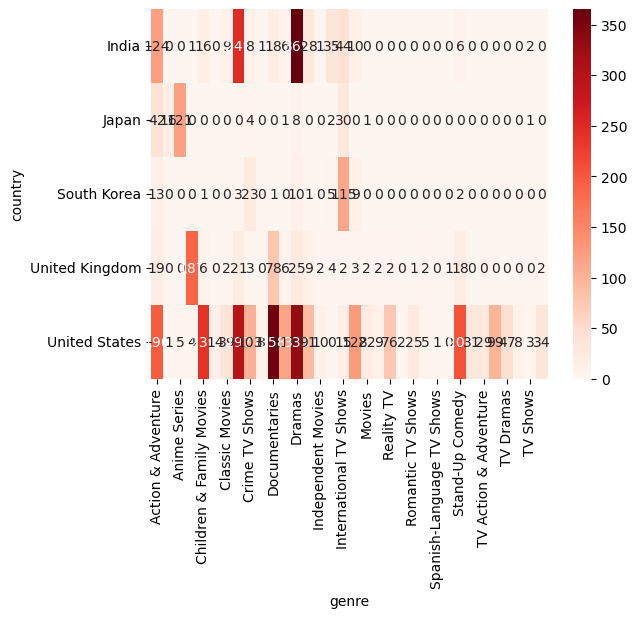

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from wordcloud import WordCloud

# Load your uploaded dataset
df = pd.read_csv(r"D:\Excelr\Projects\Netflix Project\netflix_titles.csv")

# Preprocessing
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['genre'] = df['listed_in'].astype(str).apply(lambda x: x.split(',')[0])  # primary genre

# Streamlit layout
st.title("Netflix Content Analysis Dashboard")

# Type distribution
st.subheader("Content Type Distribution")
type_count = df['type'].value_counts()
st.bar_chart(type_count)

# Yearly additions
st.subheader("Content Added Over the Years")
yearly = df['year_added'].value_counts().sort_index()
st.line_chart(yearly)

# Genre word cloud
st.subheader("Most Common Genres")
genres = ', '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)
st.image(wordcloud.to_array(), use_column_width=True)

# Country-Genre Heatmap
st.subheader("Top Countries vs Genres Heatmap")
top_countries = df['country'].dropna().value_counts().head(5).index.tolist()
heat_df = df[df['country'].isin(top_countries)]
pivot = pd.crosstab(heat_df['country'], heat_df['genre'])
st.write(sns.heatmap(pivot, annot=True, fmt="d", cmap="Reds"))
st.pyplot(plt)

st.markdown("*Data Source: Uploaded Netflix Titles Dataset*")
